https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [40]:
import pandas as pd
import json
import os

def json2csv(filein, fileout):
    # 格式需要符合csv，具体待查
    df = pd.read_json(filein)
    df.to_csv(fileout)

def csv2json(filein, fileout):
    # pd.DataFrame格式具体待查
    df = pd.read_csv(filein)
    df.to_json(fileout)

haihua_json = '/aidata/dataset/haihua_2020_detect/train/train_add_id.json'
haihua_csv = '/aidata/dataset/haihua_2020_detect/train/train_add_id.csv'

obj_json = '/root/Codes/Dan/data_statistics/coco-like_haihua2020/objs_per_cat_data.json'
obj_json_2 = '/root/Codes/Dan/data_statistics/coco-like_haihua2020/size_per_cat_data.json'
# json2csv(haihua_json, haihua_csv)

df = pd.read_json(obj_json, encoding="utf-8", orient='records')
print(df, type(pd), df.dtypes)
print(df.head(), df.index)
print(df.describe())
# df.sort_index(axis=1, ascending=False, inpalce=True)
df_sorted = df.sort_values(by="value", ascending=False)

print(df_sorted[:10])
print(df.shape)

name  value
0    塑料包装    792
1     卫生纸     46
2     木制品    478
3      胶带    357
4    指甲油瓶    187
..    ...    ...
138    豆类     71
139    薯片     70
140   荔枝壳     43
141   粉底液      6
142   苹果核     10

[143 rows x 2 columns] <class 'module'> name     object
value     int64
dtype: object
   name  value
0  塑料包装    792
1   卫生纸     46
2   木制品    478
3    胶带    357
4  指甲油瓶    187 RangeIndex(start=0, stop=143, step=1)
            value
count  143.000000
mean   196.923077
std    180.903331
min      1.000000
25%     60.000000
50%    147.000000
75%    287.000000
max    897.000000
    name  value
6   金属工具    897
0   塑料包装    792
37    药瓶    700
29    绿植    685
18  塑料玩具    680
23  口服液瓶    623
46  眼药水瓶    571
43    胶囊    549
9   金属制品    515
90  金属瓶罐    505
(143, 2)


In [21]:
# print(df_sorted.value)

6      897
0      792
37     700
29     685
18     680
      ... 
79       2
133      1
136      1
137      1
116      1
Name: value, Length: 143, dtype: int64


name map is:  {'塑料包装': 0, '卫生纸': 1, '木制品': 2, '胶带': 3, '指甲油瓶': 4, '废弃针管': 5, '金属工具': 6, '防碎气泡膜': 7, '食品外包装盒': 8, '金属制品': 9, '一次性口罩': 10, '竹制品': 11, '口红': 12, '中药渣': 13, '食品及日用品玻璃瓶罐': 14, '手机电池': 15, '插座': 16, '塑料衣架': 17, '塑料玩具': 18, '笔': 19, '电线': 20, '牙刷': 21, '锂电池': 22, '口服液瓶': 23, '打火机': 24, '鸡骨头': 25, '榴莲壳': 26, '粉笔': 27, '尼龙制品': 28, '绿植': 29, '节能灯': 30, '烟盒': 31, '易拉罐': 32, '灯管灯泡': 33, '矿泉水瓶': 34, '电路板': 35, '一次性塑料餐盒餐具': 36, '药瓶': 37, '烟头': 38, '创可贴': 39, '睫毛膏': 40, '蟹壳': 41, '橡皮泥': 42, '胶囊': 43, '西瓜子': 44, '中药材': 45, '眼药水瓶': 46, '利乐包': 47, '塑料泡沫': 48, 'X光片': 49, '面食': 50, '坚果壳': 51, '棉签': 52, '信封': 53, '风干食品': 54, '面包': 55, '甘蔗皮': 56, '报纸': 57, '保温杯': 58, '花生壳': 59, '玻璃制品': 60, '叉子': 61, '纽扣电池': 62, '大骨棒': 63, '食品塑料盒': 64, '镜子': 65, '数据线': 66, '农药瓶': 67, '碎玻璃片': 68, '小龙虾': 69, '树叶': 70, '牙膏皮': 71, '粽子': 72, '染发剂壳': 73, '毛发': 74, '菜刀': 75, '糕饼': 76, '狗尿布': 77, '饼干': 78, '胶卷': 79, '丝绸手绢': 80, '图书期刊': 81, '玉米棒': 82, '书包': 83, '枕头': 84, '篮球': 85, '棉被': 86, '床上用品': 87, '旧毛巾': 88, '快递纸

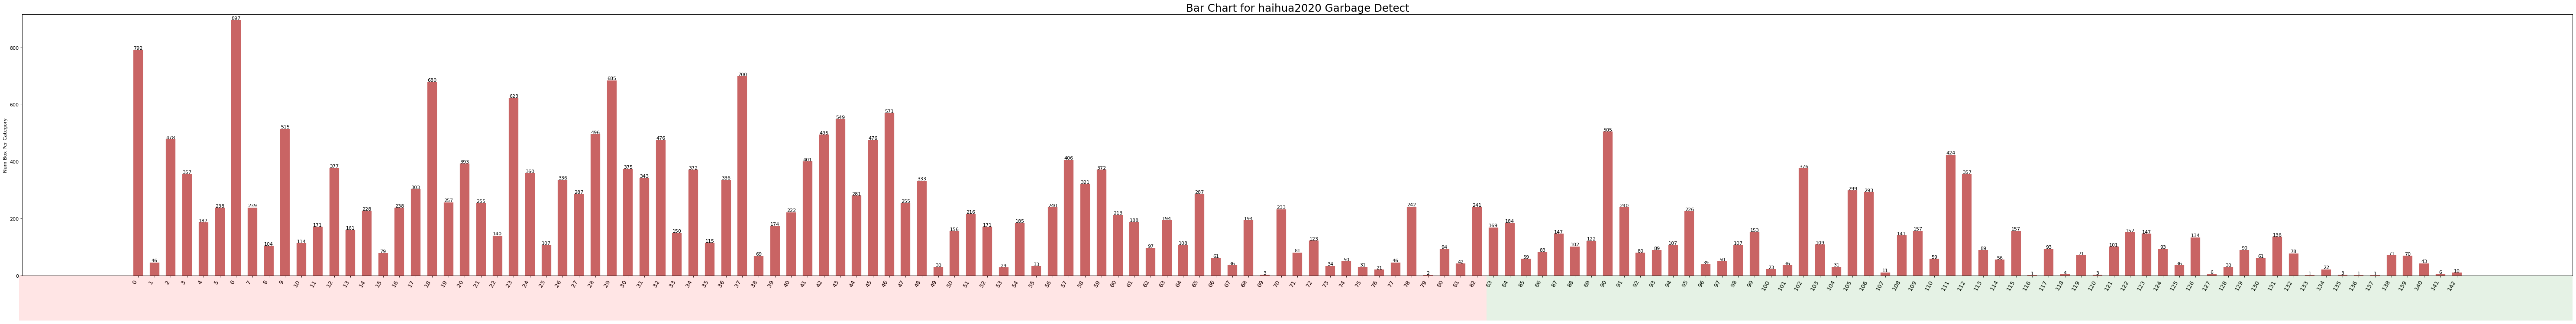

In [44]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def draw_bar_complex(df, sub_max_index=200, filter_threshold=1000):
    # 当所给类别超过sub_max_index阈值，应该均衡的画几个子图，或者只画低于某阈值的数值
    # 事先判断df，并将其拆分，单独调用此函数多次，也可
    # Draw plot
    h,w = df.shape
    if h > sub_max_index:
        sub_mid = round(np.sqrt(sub_max_index))   # 每个子图的数值个数应该是此数的倍数
        subplots_num = round(sub_mid/(sub_max_index/sub_mid))  # 此处有些边界，上下取整，待查

        fig, ax = plt.subplots(subplots_num, subplots_num, figsize=(sub_mid*subplots_num, 10))
        for i, axi in enumerate(ax.flat):
            pass

    fig, ax = plt.subplots(figsize=(int(h*2/3), 10), facecolor='white', dpi=80)
    ax.vlines(x=df.index, ymin=0, ymax=df.value,color='firebrick', alpha=0.7, linewidth=20)
    name_map = {v:k for k, v in enumerate(df.name)}

    # Annotate Text
    for i, v in enumerate(df.value):
        ax.text(i, v+1.5, round(v, 1), horizontalalignment='center')

    # Title, Label, Ticks and Ylim
    ax.set_title('Bar Chart for haihua2020 Garbage Detect', fontdict={'size':22})
    ax.set(ylabel='Num Box Per Category', ylim=(0, df.value.max()+20))
    plt.xticks(df.index, name_map.values(), rotation=60, horizontalalignment='right', fontsize=12)

    # Add patches to color the X axis labels
    p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
    p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
    fig.add_artist(p1)
    fig.add_artist(p2)
    plt.show()

def draw_bar(df, xtitle='', ytitle='', savep=''):
    # Draw plot
    h,w = df.shape
    fig, ax = plt.subplots(figsize=(int(h*2/3), 10), facecolor='white', dpi=80)
    ax.vlines(x=df.index, ymin=0, ymax=df.value,color='firebrick', alpha=0.7, linewidth=20)
    name_map = {v:k for k, v in enumerate(df.name)}
    print("name map is: ", name_map)

    # Annotate Text
    for i, v in enumerate(df.value):
        ax.text(i, v+1.5, round(v, 1), horizontalalignment='center')

    # Title, Label, Ticks and Ylim
    ax.set_title(xtitle, fontdict={'size':22})
    ax.set(ylabel=ytitle, ylim=(0, df.value.max()+20))
    plt.xticks(df.index, name_map.values(), rotation=60, horizontalalignment='right', fontsize=12)

    # Add patches to color the X axis labels
    p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
    p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
    fig.add_artist(p1)
    fig.add_artist(p2)
    # plt.savefig(savep)
    plt.show()

draw_bar(df, xtitle='Bar Chart for haihua2020 Garbage Detect', ytitle='Num Box Per Category',savep='')

测试mixupstrategy后的分布情况

In [ ]:
from pycocotools.coco import COCO

json_path = '/aidata/dataset/HeiLJ/coco_format/annotations/heilj_12_1.json'
coco = COCO(json_path)
cats = coco.loadCats(coco.getCatIds())
cat_nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(cat_nms)))